### Question - 6
Imagine you have a dataset where you have predicted loan Eligibility using any
4 different classification algorithms. Now you have to build a model which can
predict loan Eligibility and you need to find the accuracy of the model and built-in
docker and use some library to display that in frontend

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statistics as st
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier


In [2]:
#Loading dataset
data = pd.read_csv("/content/drive/MyDrive/ML/INTERMEDIATE/ML_INT_Q6/loan_data_set.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Checking the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#Checking for null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#Imputimg values inplace of Null values
data['Gender'].fillna(value=data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace= True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace= True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace= True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

#Checking null values after imputing
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
#Converting categorical columns to numerical values.
data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

HISTOGRAM

<Axes: >

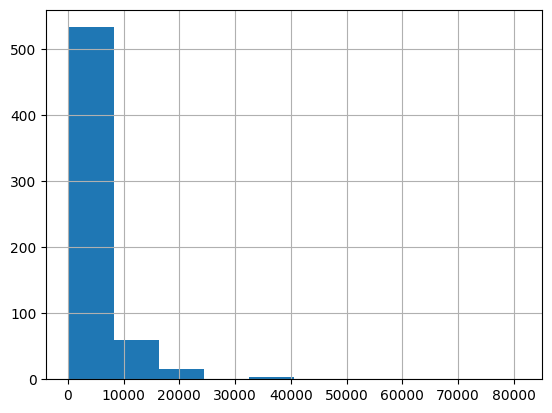

In [7]:
#Histogram
data['ApplicantIncome'].hist()


<Axes: >

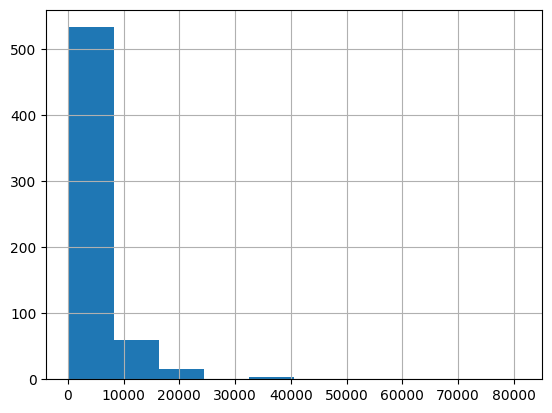

In [8]:

data['ApplicantIncome'].hist()

<Axes: >

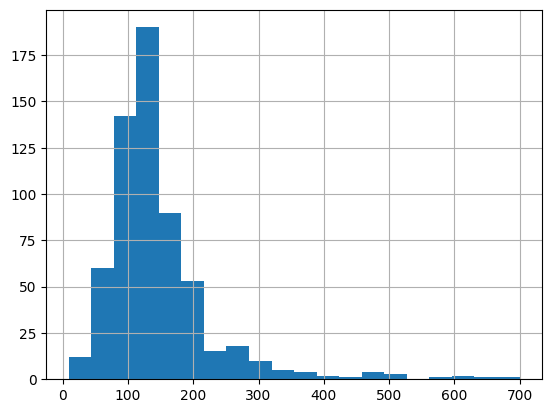

In [9]:
data['LoanAmount'].hist(bins=20)

BOX PLOT


<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

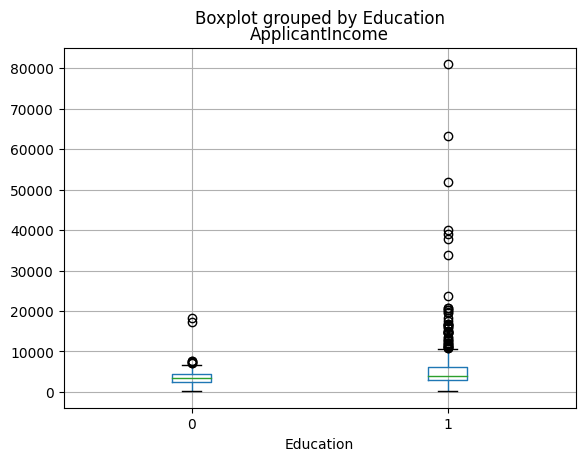

In [10]:
data.boxplot(column='ApplicantIncome', by = 'Education')

<Axes: >

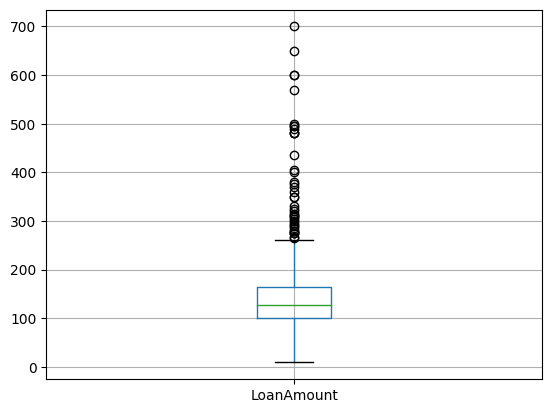

In [11]:
data.boxplot(column='LoanAmount')

<Axes: xlabel='Education', ylabel='count'>

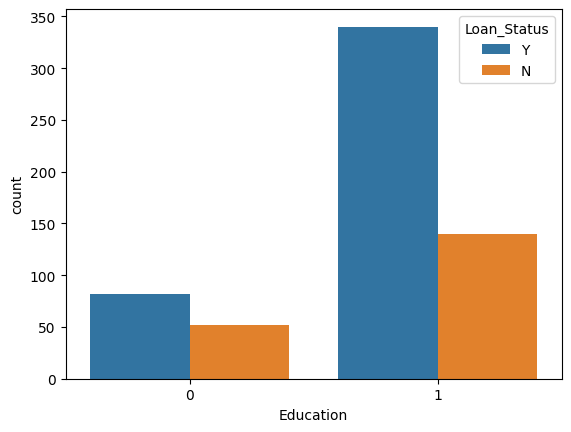

In [12]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

Plotting Bar graph as per Gender to check Employment

<ipython-input-13-a0e35d3d841c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  f=data.groupby("Gender").mean().plot(kind="bar",subplots=True,sharex=False,sharey=False,figsize=(15,10),layout=(2,5),alpha=0.7,title="According to Gender")


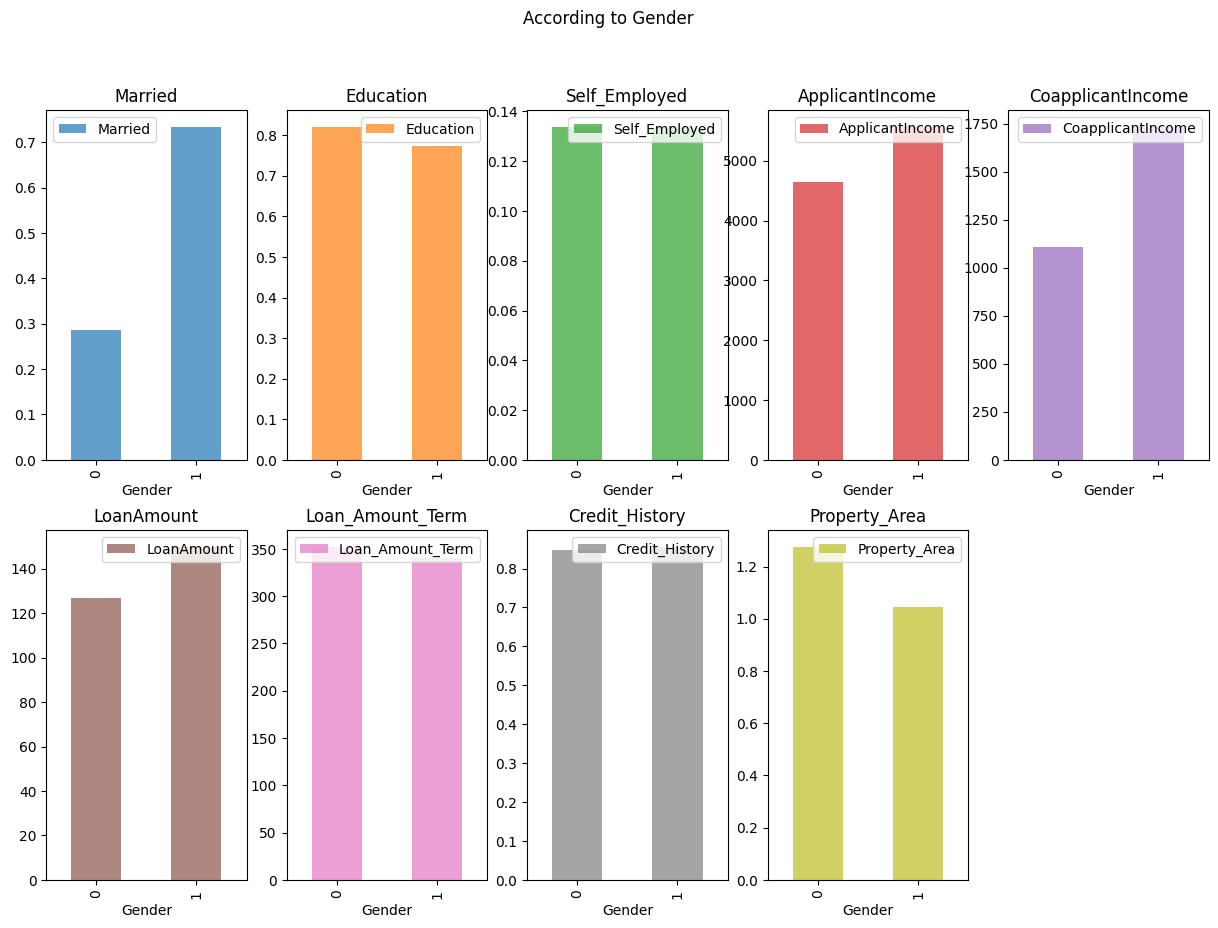

In [13]:
f=data.groupby("Gender").mean().plot(kind="bar",subplots=True,sharex=False,sharey=False,figsize=(15,10),layout=(2,5),alpha=0.7,title="According to Gender")
f= sns.set_style("darkgrid")
f=sns.set_context("paper")
plt.show()

In [14]:
#Dependent column values
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
#replacing the value of 3+ to 4
data.replace(to_replace='3+',value=4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,Y
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,Y


In [16]:
#Dependent column values
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
data.drop(["Dependents"],axis=1,inplace=True)

In [18]:
data

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,1,0,5849,0.0,128.0,360.0,1.0,1,Y
1,LP001003,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1,1,1,0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,Y
612,LP002984,1,1,1,0,7583,0.0,187.0,360.0,1.0,1,Y


In [19]:
#Splitting the data and label
X=data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,1,0,5849,0.0,128.0,360.0,1.0,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,1,0,7583,0.0,187.0,360.0,1.0,1


In [20]:
Y=data['Loan_Status']
Y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2,stratify=Y)

In [22]:
print(X.shape,X_test.shape,Y.shape,X_test.shape)

(614, 10) (62, 10) (614,) (62, 10)


In [23]:
classifier = svm.SVC(kernel='linear')

In [24]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [25]:
adaboost = AdaBoostClassifier(n_estimators=150,learning_rate=0.1)
adaboost.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=150)

In [26]:
y_pred = adaboost.predict(X_test)

In [27]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           N       0.82      0.47      0.60        19
           Y       0.80      0.95      0.87        43

    accuracy                           0.81        62
   macro avg       0.81      0.71      0.74        62
weighted avg       0.81      0.81      0.79        62



In [28]:
#Randomforest
forest = RandomForestClassifier(n_estimators=120,max_depth=8,class_weight="balanced",max_samples=2,max_leaf_nodes=3)
forest.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, max_leaf_nodes=3,
                       max_samples=2, n_estimators=120)

In [29]:
forest.score(X_train,Y_train)

0.6865942028985508

In [30]:
y_pred = forest.predict(X_test)
accuracy_score(Y_test,y_pred)


0.6935483870967742

In [31]:
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           N       0.00      0.00      0.00        19
           Y       0.69      1.00      0.82        43

    accuracy                           0.69        62
   macro avg       0.35      0.50      0.41        62
weighted avg       0.48      0.69      0.57        62



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Evaluation



In [32]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score (X_train_prediction,Y_train)

print('Accuracy score on training data : ',training_data_accuracy)

Accuracy score on training data :  0.7934782608695652


In [33]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score (X_test_prediction,Y_test)

print('Accuracy score on test data:',test_data_accuracy)

Accuracy score on test data: 0.8064516129032258
